<a href="https://colab.research.google.com/github/hwankang/chemometrics-tutorials/blob/master/5_(Mon)_Dec_01_16_pm_partial_least_sqaure_data_%3DA_NIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12월 5일 코딩 연습 김갑일 교수 

In [1]:
2+3

5

In [2]:
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
filename_a='/content/drive/MyDrive/machine_learning/A_NIR_DATA_csv.csv'
import pandas as pd
data_a = pd.read_csv(filename_a,header=0, 
                   encoding="unicode-escape")
data=data_a
     

In [7]:
data.head()

,Unnamed: 0,¸ðµ¨ Æ÷ÇÔ,Y_A,899.9280058,900.2520706,900.5763689,900.9009009,901.2256669,901.5506671,901.8759019,...,2477.700694,2480.15873,2482.621648,2485.089463,2487.562189,2490.039841,2492.522433,2495.00998,2497.502498,2500
0,1,True,24.0,0.098681,0.100515,0.102056,0.100267,0.096954,0.096161,0.097151,...,2.968741,2.968988,2.958685,2.950201,2.950122,2.948725,2.939113,2.929406,2.929555,2.927579
1,2,True,24.0,0.098081,0.099926,0.101394,0.099664,0.096598,0.095915,0.096567,...,2.960005,2.959948,2.951504,2.945633,2.947553,2.947326,2.937901,2.926926,2.924102,2.920722
2,3,True,24.0,0.089885,0.092072,0.094055,0.092618,0.089560,0.088900,0.089790,...,2.943931,2.943679,2.930295,2.919846,2.920668,2.922776,2.913596,2.904503,2.903535,2.901086
3,4,True,23.6,0.088701,0.090287,0.091825,0.090534,0.087883,0.087348,0.088151,...,2.935452,2.938259,2.928736,2.921757,2.924166,2.924666,2.914831,2.905151,2.902643,2.897351
4,5,True,23.6,0.095273,0.096945,0.098684,0.097460,0.094674,0.093949,0.094563,...,2.966199,2.968021,2.955198,2.942411,2.943006,2.942151,2.931640,2.918549,2.918717,2.917849


In [9]:
y=data['Y_A'].values
X=data.values[:,3:]

In [10]:
y.shape

(2039,)

In [11]:
X.shape

(2039, 1779)

In [14]:
# Plot the data
#wl = np.arange(1100, 2300, 2)
wl=np.linspace(0,1778,1779)
print(len(wl))

1779


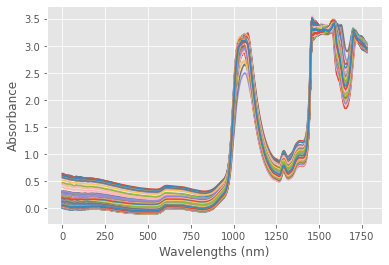

In [15]:
with plt.style.context('ggplot'):
    plt.plot(wl, X.T)
    plt.xlabel("Wavelengths (nm)")
    plt.ylabel("Absorbance")

In [16]:
X2 = savgol_filter(X, 17, polyorder=2, deriv=2)


In [17]:
def optimise_pls_cv(X, y, n_comp):
    # Define PLS object
    pls = PLSRegression(n_components=n_comp)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)

    # Calculate scores
    r2 = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_cv, r2, mse, rpd)

In [18]:
# test with 40 components
r2s = []
mses = []
rpds = []
xticks = np.arange(1, 41)
for n_comp in xticks:
    y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)

In [20]:
# Plot the mses
def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective=='min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')

        plt.xlabel('Number of PLS components')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')

    plt.show()

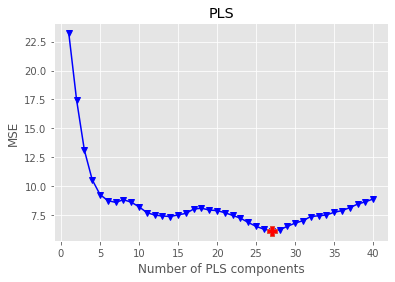

In [21]:
plot_metrics(mses, 'MSE', 'min')

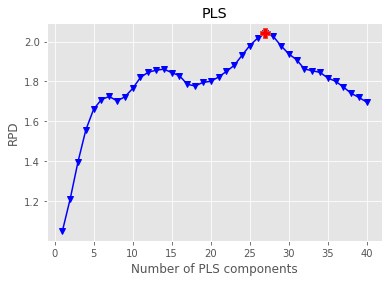

In [22]:
plot_metrics(rpds, 'RPD', 'max')

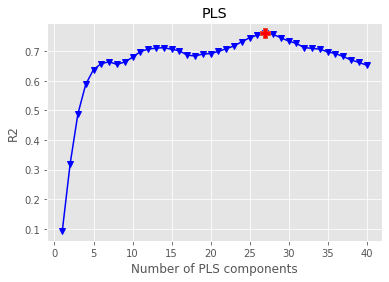

In [23]:
plot_metrics(r2s, 'R2', 'max')

In [24]:
y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, 7)

In [25]:
print('R2: %0.4f, MSE: %0.4f, RPD: %0.4f' %(r2, mse, rpd))

R2: 0.6638, MSE: 8.6042, RPD: 1.7247


#그래프 보기

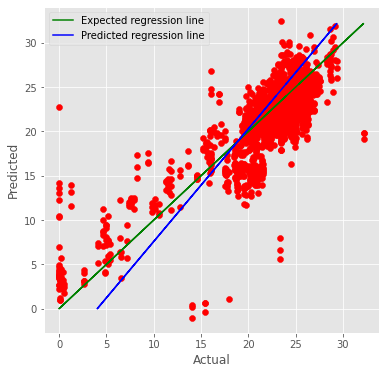

In [26]:
plt.figure(figsize=(6, 6))
with plt.style.context('ggplot'):
    plt.scatter(y, y_cv, color='red')
    plt.plot(y, y, '-g', label='Expected regression line')
    z = np.polyfit(y, y_cv, 1)
    plt.plot(np.polyval(z, y), y, color='blue', label='Predicted regression line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.plot()


#### 이 프로그램은 데모입니다. 

# 새 섹션

## 새 섹션

### 새 섹션



> 들여쓴 블록



# 새 섹션